In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai.vision import *
from fastai.metrics import error_rate

In [3]:
bs = 64

In [4]:
path = "/home/gustavo/Downloads/flores_1/flores/"

In [5]:
data = ImageDataBunch.from_folder(path, ds_tfms=get_transforms(), size=224, bs=bs//2, valid_pct = 0.1                              
                                  ).normalize(imagenet_stats)

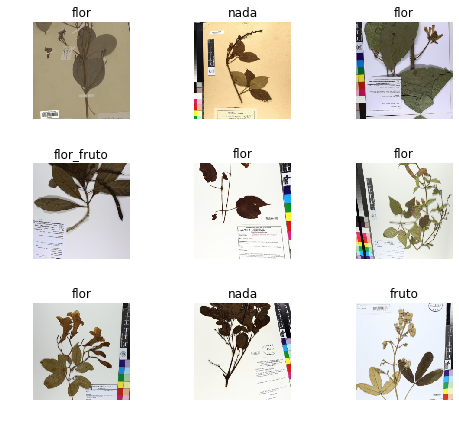

In [8]:
data.show_batch(rows=3, figsize=(7,6))

In [6]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [7]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.555346,1.267573,0.469697,00:07
1,1.315584,1.433005,0.439394,00:06
2,1.112105,1.356637,0.469697,00:06
3,0.960547,1.298458,0.454545,00:06


In [9]:
learn.save('stage-1')

In [9]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


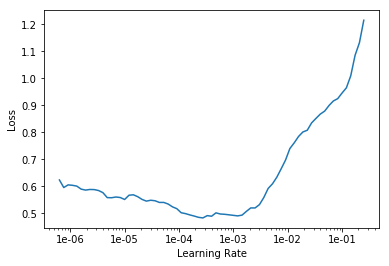

In [10]:
learn.recorder.plot()

In [8]:
learn.unfreeze()
learn.fit_one_cycle(3)

epoch,train_loss,valid_loss,error_rate,time
0,0.867497,1.380924,0.348485,00:07
1,0.884675,2.016739,0.378788,00:07
2,0.756553,1.371508,0.409091,00:07


In [13]:
learn.save('stage-2')

In [12]:
learn.unfreeze()
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate,time
0,0.509923,1.256347,0.363636,00:06
1,0.480645,1.625512,0.431818,00:06
2,0.477634,3.756613,0.613636,00:06
3,0.449858,1.801977,0.409091,00:06
4,0.414888,1.368074,0.333333,00:06


In [16]:
learn.save('corujas')

In [11]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-06,1e-03))

epoch,train_loss,valid_loss,error_rate,time
0,0.513690,1.143613,0.378788,00:07
1,0.446973,1.106016,0.348485,00:07
2,0.386495,1.192292,0.348485,00:07
3,0.337807,1.238219,0.348485,00:07
4,0.286578,1.279418,0.348485,00:07


In [29]:
learn.save('stage-3')

In [30]:
learn.unfreeze()
learn.fit_one_cycle(2, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.629779,0.492748,0.142347,01:32
1,0.451865,0.388197,0.108812,01:32


In [31]:
learn.save("stage-3")

In [32]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-5,1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.412157,0.480138,0.131288,01:30
1,0.552007,0.504420,0.136639,01:29
2,0.420783,0.435106,0.120585,01:29
3,0.258556,0.392200,0.108098,01:29
4,0.186543,0.383390,0.103104,01:29


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


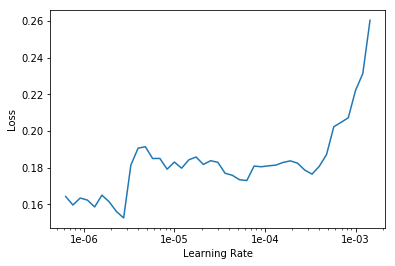

In [33]:
learn.lr_find()
learn.recorder.plot()

In [17]:
interp = ClassificationInterpretation.from_learner(learn)

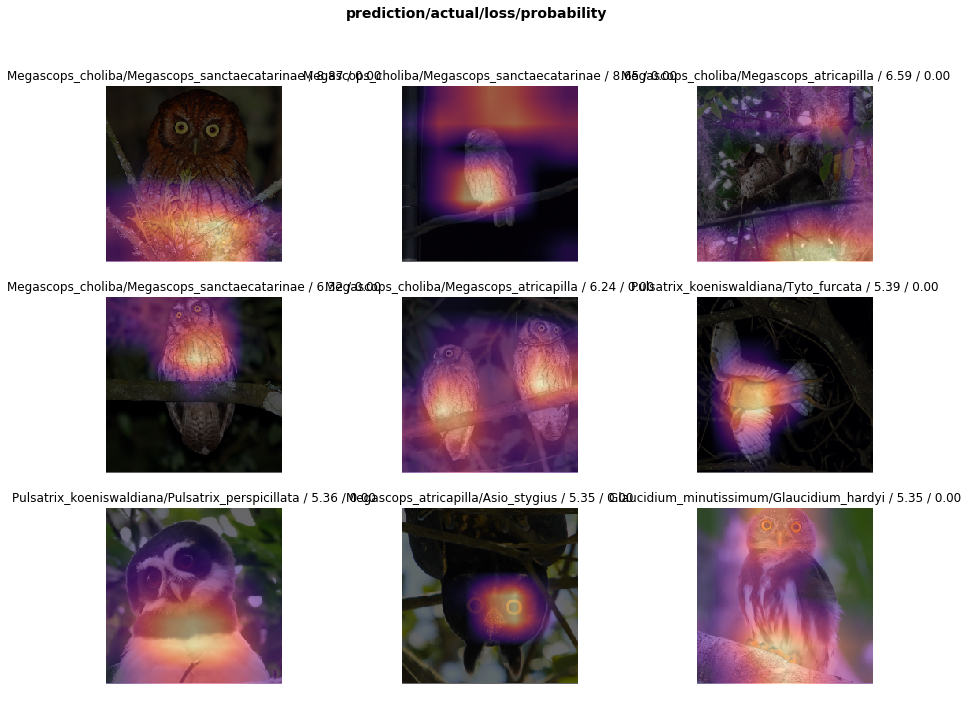

In [20]:
interp.plot_top_losses(9, figsize=(15,11))


In [21]:
print(data.classes)


['Aegolius_harrisii', 'Asio_clamator', 'Asio_flammeus', 'Asio_stygius', 'Athene_cunicularia', 'Bubo_virginianus', 'Glaucidium_brasilianum', 'Glaucidium_hardyi', 'Glaucidium_minutissimum', 'Lophostrix_cristata', 'Megascops_atricapilla', 'Megascops_choliba', 'Megascops_guatemalae', 'Megascops_sanctaecatarinae', 'Megascops_sp.', 'Megascops_usta', 'Megascops_watsonii', 'Pulsatrix_koeniswaldiana', 'Pulsatrix_perspicillata', 'Strix_huhula', 'Strix_hylophila', 'Strix_virgata', 'Tyto_furcata']
